# Clustering Business Schools
In this notebook we will cluster business schools by the data we have on the dataset.

### Import libraries

In [1]:
# Import libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Importing dataset

In [2]:
# Read CSV with specified encoding
busc_df = pd.read_csv('FT Global Business School MBA Ranking 2024.csv', encoding='latin1')
busc_df.head()

,#,School Name,Alumni network rank,Carbon footprint rank,Weighted salary (US$),Value for money rank,Career progress rank,"Location, by primary campus",Rank in 2022,Three-year average rank,...,Sector diversity rank,Female faculty (%),Female students (%),International faculty (%),Overall satisfaction **,ESG and net zero teaching rank,International mobility rank,International course experience rank,Faculty with doctorates (%),FT research rank
0,1,University of Pennsylvania: Wharton,25,56,"245,772",95,18,US,1,-,...,84,31,50,32,9.198,61,54,34,96,1
1,2,Insead,20,13,"198,904",23,40,France,3,2,...,81,24,36,88,9.155,8,13,11,99,10
2,3,Columbia Business School,17,61,"232,760",76,9,US,2,2,...,78,29,44,58,9.225,67,55,55,93,4
3,3,SDA Bocconi School of Management,38,1,"202,534",5,43,Italy,13,7,...,33,38,29,44,8.997,29,35,15,99,29
4,5,IESE Business School,5,7,"186,339",97,26,Spain,10,6,...,20,41,34,73,9.603,2,22,12,100,36


Drop column '#'

In [3]:
busc_df = busc_df.drop('#', axis=1)


#### Checking datatypes of dataset

In [4]:
busc_df.dtypes

School Name                              object
Alumni network rank                       int64
Carbon footprint rank                     int64
Weighted salary (US$)                    object
Value for money rank                      int64
Career progress rank                      int64
Location, by primary campus              object
Rank in 2022                             object
Three-year average rank                  object
Audit year *                             object
Rank in 2023                             object
Salary today (US$) **                    object
Employed at three months (%)             object
Salary percentage increase                int64
Aims achieved (%)                         int64
Careers service rank                      int64
International board (%)                  object
Women on board (%)                       object
International students (%)                int64
Sector diversity rank                     int64
Female faculty (%)                      

#### Converting datatypes object to float
first we will see the object types variables

In [5]:
# Get objects columns that will fit into the model
columns_to_convert = ['Weighted salary (US$)', 'Rank in 2022', 'Three-year average rank', 'Audit year *', 'Rank in 2023', 'Salary today (US$) **', 'Employed at three months (%)', 'International board (%)', 'Women on board (%)', 'International faculty (%)']
busc_df[columns_to_convert].head()

,Weighted salary (US$),Rank in 2022,Three-year average rank,Audit year *,Rank in 2023,Salary today (US$) **,Employed at three months (%),International board (%),Women on board (%),International faculty (%)
0,"245,772",1,-,"2,018",-,"247,875",92 (92),35,21,32
1,"198,904",3,2,"2,020",2,"202,294",84 (99),83,50,88
2,"232,760",2,2,"2,019",1,"232,756",81 (91),37,21,58
3,"202,534",13,7,"2,019",6,"202,534",95 (94),79,36,44
4,"186,339",10,6,"2,022",3,"187,667",94 (89),90,32,73


Then we will find non-numeric values in the columns we want to convert

In [6]:
# Find non-numeric results in columns_to_convert
for i in columns_to_convert:
    print(i)
    non_numeric_vars = busc_df[pd.to_numeric(busc_df[i], errors='coerce').isna()][i]
    print(non_numeric_vars.head(5))


Weighted salary (US$)
0    245,772
1    198,904
2    232,760
3    202,534
4    186,339
Name: Weighted salary (US$), dtype: object
Rank in 2022
23    -
51    -
63    -
65    -
73    -
Name: Rank in 2022, dtype: object
Three-year average rank
0     -
23    -
36    -
51    -
63    -
Name: Three-year average rank, dtype: object
Audit year *
0    2,018
1    2,020
2    2,019
3    2,019
4    2,022
Name: Audit year *, dtype: object
Rank in 2023
0     -
36    -
63    -
80    -
86    -
Name: Rank in 2023, dtype: object
Salary today (US$) **
0    247,875
1    202,294
2    232,756
3    202,534
4    187,667
Name: Salary today (US$) **, dtype: object
Employed at three months (%)
0    92 (92)
1    84 (99)
2    81 (91)
3    95 (94)
4    94 (89)
Name: Employed at three months (%), dtype: object
International board (%)
10    0 ?
48    0 ?
51    0 ?
70    0 ?
Name: International board (%), dtype: object
Women on board (%)
10    0 ?
48    0 ?
Name: Women on board (%), dtype: object
International faculty (

We will apply different transforms to each column, as they don't have the same problem to be converted to numeric values

In [7]:

# Replace ',' with nothing in specified columns
columns_to_replace = ['Weighted salary (US$)', 'Audit year *', 'Salary today (US$) **']
busc_df[columns_to_replace] = busc_df[columns_to_replace].apply(lambda x: x.str.replace(',', ''))

# Replace '-' with 0 in Rank in 2022, Rank in 2023 and Three-year average rank
columns_to_replace = ['Rank in 2022', 'Rank in 2023', 'Three-year average rank', 'International board (%)']
busc_df[columns_to_replace] = busc_df[columns_to_replace].apply(lambda x: x.str.replace('-', '0'))

# Replace '?' with 0 in Women on board (%), International board (%) and International faculty (%)
columns_to_replace = ['Women on board (%)', 'International board (%)', 'International faculty (%)']
busc_df[columns_to_replace] = busc_df[columns_to_replace].apply(lambda x: x.str.replace('?', '0'))


# Stay only with the percentage in Employed at three months (%)
busc_df['Employed at three months (%)'] = busc_df['Employed at three months (%)'].str.extract(r'\((\d+)\)').astype(float) / 100

# Verify the changes
busc_df[columns_to_convert].head()

C:\Users\agust\AppData\Local\Temp\ipykernel_54976\3919419470.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  busc_df[columns_to_replace] = busc_df[columns_to_replace].apply(lambda x: x.str.replace('?', '0'))


,Weighted salary (US$),Rank in 2022,Three-year average rank,Audit year *,Rank in 2023,Salary today (US$) **,Employed at three months (%),International board (%),Women on board (%),International faculty (%)
0,245772,1,0,2018,0,247875,0.92,35,21,32
1,198904,3,2,2020,2,202294,0.99,83,50,88
2,232760,2,2,2019,1,232756,0.91,37,21,58
3,202534,13,7,2019,6,202534,0.94,79,36,44
4,186339,10,6,2022,3,187667,0.89,90,32,73


Checking again to see if there is something left...

In [8]:
# Find non-numeric results in 'International board (%)'
for i in columns_to_convert:
    print(i)
    non_numeric_vars = busc_df[pd.to_numeric(busc_df[i], errors='coerce').isna()][i]
    print(non_numeric_vars.head(5))

Weighted salary (US$)
Series([], Name: Weighted salary (US$), dtype: object)
Rank in 2022
Series([], Name: Rank in 2022, dtype: object)
Three-year average rank
Series([], Name: Three-year average rank, dtype: object)
Audit year *
Series([], Name: Audit year *, dtype: object)
Rank in 2023
Series([], Name: Rank in 2023, dtype: object)
Salary today (US$) **
Series([], Name: Salary today (US$) **, dtype: object)
Employed at three months (%)
Series([], Name: Employed at three months (%), dtype: float64)
International board (%)
10    0 0
48    0 0
51    0 0
70    0 0
Name: International board (%), dtype: object
Women on board (%)
10    0 0
48    0 0
Name: Women on board (%), dtype: object
International faculty (%)
22    0 0 
Name: International faculty (%), dtype: object


changing the last one...

In [9]:
# Replace '?' with 0 in Women on board (%), International board (%) and International faculty (%)
columns_to_replace = ['Women on board (%)', 'International board (%)', 'International faculty (%)']
busc_df[columns_to_replace] = busc_df[columns_to_replace].apply(lambda x: x.str.replace('0 0', '0'))

converting to numeric values to fit in the model

In [10]:
# Convert specified columns to numeric types
columns_to_convert = ['Weighted salary (US$)', 'Rank in 2022', 'Three-year average rank', 'Audit year *', 'Rank in 2023', 'Salary today (US$) **', 'Employed at three months (%)', 'International board (%)', 'Women on board (%)', 'International faculty (%)']

busc_df[columns_to_convert] = busc_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verify the changes
busc_df[columns_to_convert].dtypes

Weighted salary (US$)             int64
Rank in 2022                      int64
Three-year average rank           int64
Audit year *                      int64
Rank in 2023                      int64
Salary today (US$) **             int64
Employed at three months (%)    float64
International board (%)           int64
Women on board (%)                int64
International faculty (%)         int64
dtype: object

Checking that there are no NaNs in the data.

In [11]:
# Find NaN values in the dataframe
nan_counts = busc_df.isna().sum()
print(nan_counts)

School Name                             0
Alumni network rank                     0
Carbon footprint rank                   0
Weighted salary (US$)                   0
Value for money rank                    0
Career progress rank                    0
Location, by primary campus             0
Rank in 2022                            0
Three-year average rank                 0
Audit year *                            0
Rank in 2023                            0
Salary today (US$) **                   0
Employed at three months (%)            0
Salary percentage increase              0
Aims achieved (%)                       0
Careers service rank                    0
International board (%)                 0
Women on board (%)                      0
International students (%)              0
Sector diversity rank                   0
Female faculty (%)                      0
Female students (%)                     0
International faculty (%)               0
Overall satisfaction **           

#### Checking all values that will fit the model

In [12]:
busc_df.loc[:, ~busc_df.columns.isin(['School Name', 'Location, by primary campus'])].head()


,Alumni network rank,Carbon footprint rank,Weighted salary (US$),Value for money rank,Career progress rank,Rank in 2022,Three-year average rank,Audit year *,Rank in 2023,Salary today (US$) **,...,Sector diversity rank,Female faculty (%),Female students (%),International faculty (%),Overall satisfaction **,ESG and net zero teaching rank,International mobility rank,International course experience rank,Faculty with doctorates (%),FT research rank
0,25,56,245772,95,18,1,0,2018,0,247875,...,84,31,50,32,9.198,61,54,34,96,1
1,20,13,198904,23,40,3,2,2020,2,202294,...,81,24,36,88,9.155,8,13,11,99,10
2,17,61,232760,76,9,2,2,2019,1,232756,...,78,29,44,58,9.225,67,55,55,93,4
3,38,1,202534,5,43,13,7,2019,6,202534,...,33,38,29,44,8.997,29,35,15,99,29
4,5,7,186339,97,26,10,6,2022,3,187667,...,20,41,34,73,9.603,2,22,12,100,36


## Creating KMeans Model


In [13]:

# Select the data to cluster, excluding specified columns
data_to_cluster = busc_df.loc[:, ~busc_df.columns.isin(['School Name', 'Location, by primary campus'])]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
data_to_cluster_scaled = scaler.fit_transform(data_to_cluster)

# Convert the scaled data back to a DataFrame
data_to_cluster_scaled = pd.DataFrame(data_to_cluster_scaled, columns=data_to_cluster.columns)


# Verify the changes
data_to_cluster_scaled.head()


,Alumni network rank,Carbon footprint rank,Weighted salary (US$),Value for money rank,Career progress rank,Rank in 2022,Three-year average rank,Audit year *,Rank in 2023,Salary today (US$) **,...,Sector diversity rank,Female faculty (%),Female students (%),International faculty (%),Overall satisfaction **,ESG and net zero teaching rank,International mobility rank,International course experience rank,Faculty with doctorates (%),FT research rank
0,0.242424,0.578947,0.969674,0.949495,0.171717,0.010101,0.000000,0.250,0.00,0.956268,...,0.846939,0.512821,0.727273,0.326531,0.665086,0.606061,0.535354,0.434211,0.87500,0.000000
1,0.191919,0.126316,0.678297,0.222222,0.393939,0.030303,0.021978,0.500,0.02,0.680528,...,0.816327,0.333333,0.472727,0.897959,0.646552,0.070707,0.121212,0.131579,0.96875,0.090909
2,0.161616,0.631579,0.888778,0.757576,0.080808,0.020202,0.021978,0.375,0.01,0.864807,...,0.785714,0.461538,0.618182,0.591837,0.676724,0.666667,0.545455,0.710526,0.78125,0.030303
3,0.373737,0.000000,0.700864,0.040404,0.424242,0.131313,0.076923,0.375,0.06,0.681980,...,0.326531,0.692308,0.345455,0.448980,0.578448,0.282828,0.343434,0.184211,0.96875,0.282828
4,0.040404,0.063158,0.600180,0.969697,0.252525,0.101010,0.065934,0.750,0.03,0.592043,...,0.193878,0.769231,0.436364,0.744898,0.839655,0.010101,0.212121,0.144737,1.00000,0.353535


Our model will have 10 clusters

In [14]:
# Kmeans with 3 clusters, we will divide our customers in three different segments.
kmeans=KMeans(n_clusters = 10, init = 'k-means++', max_iter=600, random_state=0)
kmeans.fit(data_to_cluster_scaled)

c:\Users\agust\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=600, n_clusters=10, random_state=0)

### Setting the Cluster to each Business School

In [15]:
# Now that we have defined our model and fit our customers
busc_df['Clusters']=kmeans.labels_
data_to_cluster_scaled['Clusters']=kmeans.labels_

### Creating a Heatmap to see the clusters centers
Which variables where the ones that the model most take into account?

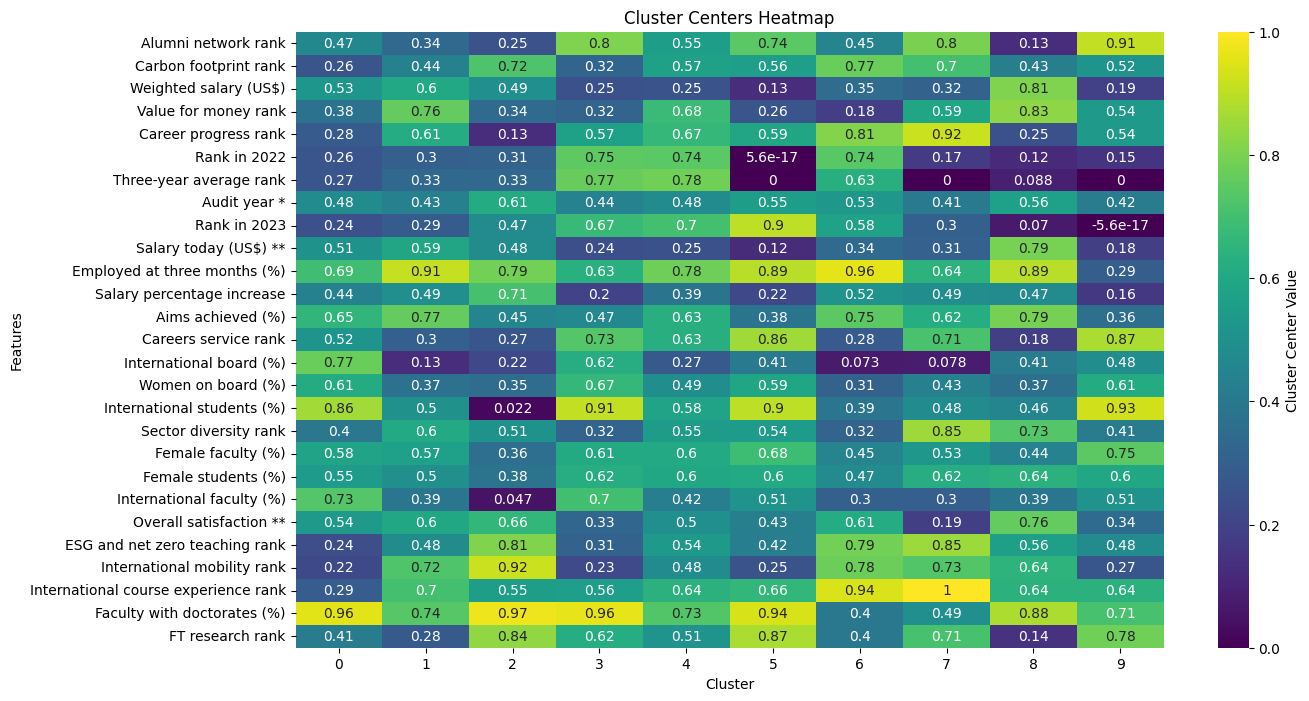

In [16]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame to display the cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=busc_df.columns.drop(['School Name', 'Location, by primary campus', 'Clusters']))


# Plot the cluster centers using seaborn for better visualization
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_centers_df.T, annot=True, cmap='viridis', cbar_kws={'label': 'Cluster Center Value'})
plt.title('Cluster Centers Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()



The heatmap of the cluster centers provides a clear visualization of the key features that differentiate the clusters. Each row in the heatmap represents a feature, and each column represents a cluster. The color intensity indicates the value of the feature for that cluster, with lighter colors representing higher values.

From the heatmap, we can observe the following:

- Certain features, such as `Weighted salary (US$)`, `Salary today (US$) **`, and `Employed at three months (%)`, have significant variations across clusters, indicating their importance in defining the clusters.
- Features like `International board (%)`, `Women on board (%)`, and `International faculty (%)` also show noticeable differences, highlighting their role in the clustering process.
- The clusters exhibit distinct profiles, with some clusters having higher values for specific features, while others have lower values. This differentiation helps in understanding the unique characteristics of each cluster.

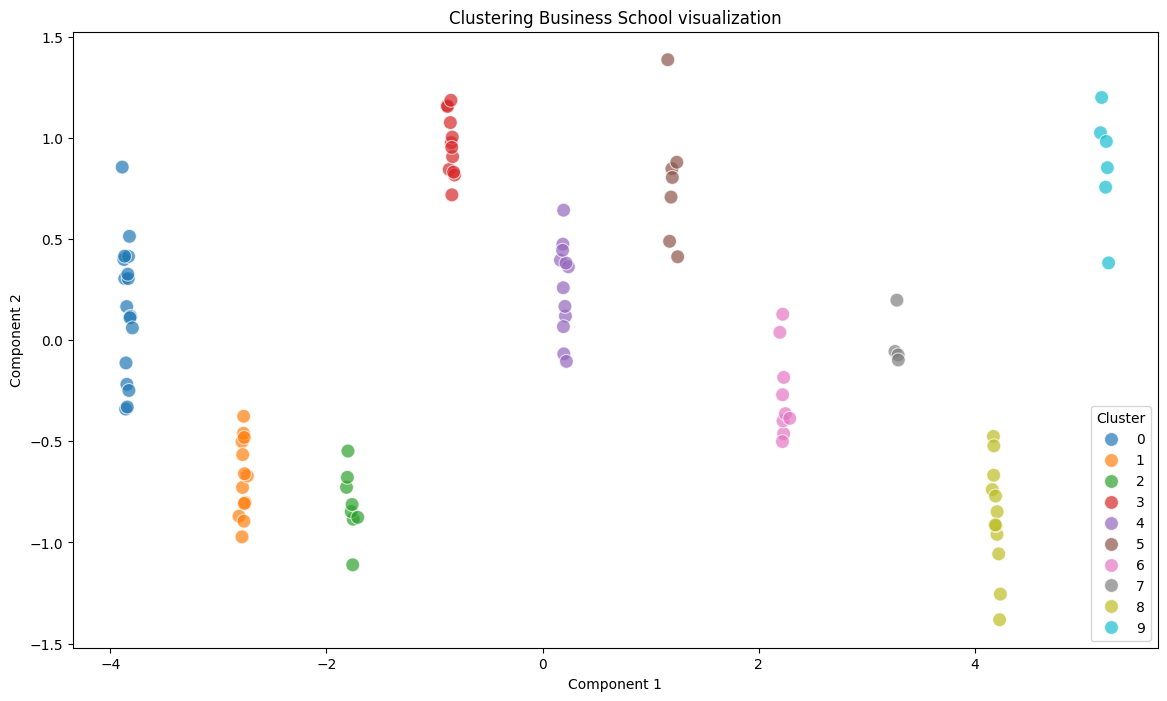

In [17]:
# Making the logic to plot a graph 
pca = PCA(2)
pca_res = pca.fit_transform(data_to_cluster_scaled)
data_to_cluster_scaled['X'] = pca_res[:,0]
data_to_cluster_scaled['Y'] = pca_res[:,1]

busc_df['X'] = data_to_cluster_scaled['X']
busc_df['Y'] = data_to_cluster_scaled['Y']

# Plotting the clusters using seaborn
plt.figure(figsize=(14, 8))
sns.scatterplot(data=busc_df, x='X', y='Y', hue='Clusters', palette='tab10', s=100, alpha=0.7)
plt.title('Clustering Business School visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(title='Cluster')
plt.show()


In [23]:

# Show first five school names of each cluster
for cluster in range(10):
    print(f"Cluster {cluster}:")
    first_five_per_cluster=busc_df[busc_df['Clusters'] == cluster]['School Name'].head(5)
    print(first_five_per_cluster)

Cluster 0:
1                               Insead
3     SDA Bocconi School of Management
4                 IESE Business School
7               London Business School
11                           HEC Paris
Name: School Name, dtype: object
Cluster 1:
15                 University of Virginia: Darden
17             UCLA Anderson School of Management
18     University of California at Berkeley: Haas
20                     New York University: Stern
29    University of Washington: Michael G. Foster
Name: School Name, dtype: object
Cluster 2:
23    Shanghai University of Finance and Economics: ...
27                Fudan University School of Management
30                            Indian School of Business
40             Indian Institute of Management Ahmedabad
46             Indian Institute of Management Bangalore
Name: School Name, dtype: object
Cluster 3:
53                                Essec Business School
56                                Edhec Business School
57                  

## Conclusion
In this notebook, we performed a comprehensive analysis of the FT Global Business School MBA Ranking 2024 dataset.  
We started by importing the necessary libraries and reading the dataset.  
This included handling missing values, converting non-numeric columns to numeric, and encoding categorical variables.  
  
We applied KMeans clustering to segment the business schools into different clusters based on various features.  
We visualized the cluster centers and the distribution of schools within each cluster using heatmaps and scatter plots.  
This helped us understand the characteristics of each cluster and the similarities and differences between the schools.  
  
The clustering analysis revealed distinct groups of business schools with similar profiles, which can be useful for prospective students, educators, and policymakers to make informed decisions.  
The visualizations provided clear insights into the data, highlighting key patterns and trends.